**Data Loading**

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
#import pydotplus

Populating the interactive namespace from numpy and matplotlib


In [11]:
df_sample = pd.read_csv('sample_submission.csv')
df_sample.head()

,ID,target
0,000137c73,5.944923e+06
1,00021489f,5.944923e+06
2,0004d7953,5.944923e+06
3,00056a333,5.944923e+06
4,00056d8eb,5.944923e+06


In [12]:
df_train_O = pd.read_csv('train.csv')

In [13]:
df_test_O = pd.read_csv('test.csv')

In [14]:
df_sample.head()

,ID,target
0,000137c73,5.944923e+06
1,00021489f,5.944923e+06
2,0004d7953,5.944923e+06
3,00056a333,5.944923e+06
4,00056d8eb,5.944923e+06


**Data Checking & Cleaning**

In [65]:
df_train_O[df_train_O.target <= 0]

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466


In [15]:
# Dimension Checking
df_train_O.shape

(4459, 4993)

In [16]:
#Null Values Checking: No NAN Value
df_train_O.isnull().values.any()

False

In [17]:
#Data info checking 
df_train_O.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


**EDA Analysis**

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


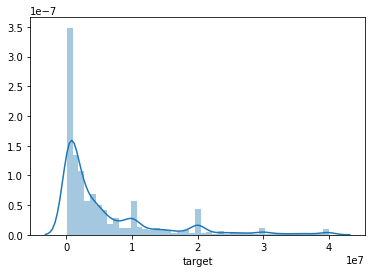

In [18]:
sns.distplot(df_train_O.target)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


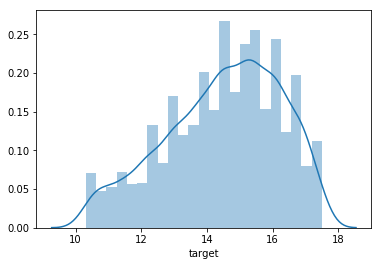

In [19]:
#Nice to have log transform
sns.distplot(log(df_train_O.target))

In [20]:
df_train_O.corr()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
target,1.000000,0.010188,0.013805,0.014694,-0.002917,0.016647,-0.019786,0.004417,-0.015538,0.229035,...,0.024144,-0.008676,0.041449,0.023431,-0.010614,0.016907,-0.009177,0.018350,-0.016892,-0.025575
48df886f9,0.010188,1.000000,-0.000815,-0.001461,-0.000723,-0.000656,-0.002004,-0.000845,0.002621,0.006629,...,-0.004151,-0.001789,0.006381,-0.004301,0.014979,-0.000968,-0.000833,-0.002723,-0.002106,-0.004738
0deb4b6a8,0.013805,-0.000815,1.000000,-0.001015,-0.000416,-0.000377,-0.001152,-0.000486,-0.000538,-0.003995,...,-0.002488,-0.002173,-0.003863,-0.002472,-0.000324,-0.000556,-0.000479,0.027427,-0.001220,-0.002723
34b15f335,0.014694,-0.001461,-0.001015,1.000000,-0.000901,-0.000818,-0.002496,-0.001053,-0.001165,0.017082,...,-0.000338,-0.004708,-0.000233,-0.005357,-0.000702,-0.001206,-0.001038,-0.003386,-0.002643,0.021261
a8cb14b00,-0.002917,-0.000723,-0.000416,-0.000901,1.000000,-0.000335,-0.001022,-0.000431,-0.000477,-0.005135,...,-0.002208,-0.001928,-0.003428,-0.002194,-0.000288,-0.000494,-0.000425,-0.001389,-0.001082,-0.002417
2f0771a37,0.016647,-0.000656,-0.000377,-0.000818,-0.000335,1.000000,-0.000928,-0.000391,-0.000433,-0.004663,...,-0.002005,-0.001751,-0.003113,-0.001992,-0.000261,-0.000448,-0.000386,-0.001261,-0.000983,-0.002195
30347e683,-0.019786,-0.002004,-0.001152,-0.002496,-0.001022,-0.000928,1.000000,-0.001195,-0.001322,-0.002268,...,-0.005900,0.000925,0.010160,0.041662,-0.000797,0.003402,0.005180,-0.003850,-0.003000,0.015287
d08d1fbe3,0.004417,-0.000845,-0.000486,-0.001053,-0.000431,-0.000391,-0.001195,1.000000,-0.000558,-0.005950,...,-0.002528,-0.002254,-0.004008,-0.002565,-0.000336,-0.000577,-0.000497,-0.001624,-0.001265,-0.002826
6ee66e115,-0.015538,0.002621,-0.000538,-0.001165,-0.000477,-0.000433,-0.001322,-0.000558,1.000000,-0.006168,...,-0.002856,-0.002462,-0.004436,-0.002839,-0.000372,-0.000639,-0.000550,-0.001797,-0.001400,0.031604
20aa07010,0.229035,0.006629,-0.003995,0.017082,-0.005135,-0.004663,-0.002268,-0.005950,-0.006168,1.000000,...,0.017541,-0.008562,0.011548,0.024004,-0.004005,0.033846,-0.001322,-0.012493,-0.008744,-0.003522


**Validation Data Setting**

In [21]:
#Training data
df_train_V = df_train_O.sample(frac = 0.9)

In [22]:
#Validation data
df_test_V = df_train_O[df_train_O.index.isin(set(df_train_O.index).symmetric_difference(set(df_train_V.index)))]

In [23]:
#train: Create X & Y
df_train_X = df_train_V.drop(['target'], axis=1)
df_train_Y = df_train_V.target
df_train_Y2 = log(df_train_V.target +1) #Log Y

In [24]:
#test: Create X & Y
df_test_X = df_test_V.drop(['target'], axis=1)
df_test_Y = df_test_V.target
df_test_Y2 = log(df_test_V.target +1) #Log Y

**Model Testing**

**1. Linear Regression & Log transformation: Failed**

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg = LinearRegression()

In [27]:
reg.fit(df_train_X.iloc[:,1:], df_train_Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
y_pred = reg.predict(df_train_X.iloc[:,1:])

In [29]:
y_pred.reshape(-1,1)

array([[14.02523191],
       [13.52783024],
       [11.51293582],
       ...,
       [16.81124283],
       [15.25059537],
       [16.81124282]])

In [30]:
df_train_Y2

1152    14.025232
1033    13.527830
692     11.512935
3868    14.508658
520     14.025232
33      16.811243
2473    12.206078
333     13.304687
3888    16.811243
4316    15.607270
4334    15.262430
92      15.608603
4445    13.815512
1677    16.672900
2402    15.297115
3189    16.012735
1508    10.819798
1377    15.963467
39      15.671809
530     10.819798
2689    14.650640
3897    13.815512
1367    10.736418
2707    14.953344
2196    14.508658
2333    12.899222
1245    14.508658
2408    16.118096
1779    15.894952
1356    16.185754
          ...    
1285    16.811243
2027    10.308986
529     16.118096
412     15.258847
3568    14.508658
4384    12.899222
893     16.523561
3664    15.540845
2940    16.012735
433     11.034906
2401    12.154785
563     14.739770
1510    14.147689
2056    14.285515
3564    16.118096
3022    16.523561
2372    16.811243
905     15.297115
23      16.515932
3846    11.289794
2975    12.154785
3952    14.508658
3103    13.492548
1898    16.915603
3069    13

In [31]:
from sklearn.metrics import r2_score
r2_score(df_train_Y2, y_pred) 

0.997861479008133

In [32]:
y_pred2 = reg.predict(df_test_X.iloc[:,1:])

In [33]:
r2_score(df_test_Y2, y_pred2) #weird 

-17541603191431.236

** Sampling Improved **

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [35]:
df2 = df_train_O

In [36]:
df2.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [37]:
df2['target'] = log(df2['target'])

In [38]:
X = df2.iloc[:,2:]
X.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [39]:
y = df2.target

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [41]:
reg_all = LinearRegression()

In [42]:
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
y_pred = reg_all.predict(X_test)

In [44]:
reg_all.score(X_test, y_test)

-4.3645754756730944e+17

In [45]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

1137463604.8176746

** Cross Validation: 5 **

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
cv_scores = cross_val_score(reg_all, X, y,cv=5)
cv_scores

array([-9.60005750e+11, -3.84599171e+12, -5.84160369e+09, -4.30764185e+09,
       -1.91320489e+15])

** Decision Tree **

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
regr_1 = DecisionTreeRegressor(max_depth=3)

In [51]:
regr_1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [52]:
y_1 = regr_1.predict(X_test)

In [53]:
rmse = np.sqrt(mean_squared_error(y_test,y_1))
rmse

1.6445132565096752

In [54]:
regr_2 = DecisionTreeRegressor(max_depth = 5)

In [55]:
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [58]:
y_2 = regr_2.predict(X_test)

In [59]:
rmse = np.sqrt(mean_squared_error(y_test,y_2))
rmse

1.6315552100313895

In [61]:
regr_2.score(X_test, y_test)

0.10201199026064889

In [60]:
cv_scores2 = cross_val_score(regr_2, X, y,cv=5)
cv_scores2

array([0.14261084, 0.08588083, 0.08786376, 0.11940822, 0.05871404])

In [62]:
cv_scores2.mean()

0.09889553932937763

In [49]:
#data mining 
#feature selection: random tree, PCA, (N network)
#Train_row < Test_row
#Zero-inflated possion / NB
#semi=supervised learning 
#loss function
#SVM